In [1]:
import pandas as pd
import numpy as np 
import copy
from matplotlib import pyplot as plt
import seaborn as sns
from collections import *
import datetime

In [2]:
dc=pd.read_excel(r"C:\Users\Mark 1\tdamprd_df_strd.xlsx")
dc = dc.loc[:, ~dc.columns.str.contains('^Unnamed')]
dc.tail()

,date,original_val,mean_based,max_based,mean_max_based,max_mean_based,mean_last_based,last_mean_based,last_based,middle_based
191,2020-10-04,102129,99130,102471,102311,99286,102311,98996,102172,99315
192,2020-10-05,103015,100131,103385,103192,100318,103192,99983,103040,100332
193,2020-10-06,104005,101184,104282,104095,101367,104095,101004,103909,101368
194,2020-10-07,104965,102165,105270,105055,102374,105055,102116,105005,102172
195,2020-10-08,0,103110,106141,105981,103265,105981,103064,105934,103040


In [3]:
dce=pd.read_excel(r"C:\Users\Mark 1\tdamerrprd_df_strd.xlsx")
dce = dce.loc[:, ~dce.columns.str.contains('^Unnamed')]
errdf=dce=dce.loc[:,["date","mb","mxb","mxb","memb","mxmb","mlb","lmb","lb","mdb"]]
errdf.tail()

,date,mb,mxb,mxb,memb,mxmb,mlb,lmb,lb,mdb
191,2020-10-04,2999,-342,-342,-182,2843,-182,3133,-43,2814
192,2020-10-05,2884,-370,-370,-177,2697,-177,3032,-25,2683
193,2020-10-06,2821,-277,-277,-90,2638,-90,3001,96,2637
194,2020-10-07,2800,-305,-305,-90,2591,-90,2849,-40,2793
195,2020-10-08,-103110,-106141,-106141,-105981,-103265,-105981,-103064,-105934,-103040


In [4]:
erdt=pd.read_excel(r"C:\Users\Mark 1\tderr_df.xlsx")
erdt = erdt.loc[:, ~erdt.columns.str.contains('^Unnamed')]
erdt['original_val']=erdt['original_val'].astype('int')
erdt['date']=erdt['date'].astype('datetime64[ns]')
erdt.tail()

,date,mipe,mxne,mipv,mxnv,original_val,pprd_val,nprd_val
191,2020-10-04,mdb,lb,2814,-43,102129,99315,102172
192,2020-10-05,mdb,lb,2683,-25,103015,100332,103040
193,2020-10-06,lb,memb,96,-90,104005,103909,104095
194,2020-10-07,mxmb,lb,2591,-40,104965,102374,105005
195,2020-10-08,No,mdb,No,-103040,0,No,103040


In [5]:
erdtpv=erdt[erdt['mipv']!='No']
erdtpv['mipe']=erdtpv['mipe'].astype('str')
erdtpv['mipv']=erdtpv['mipv'].astype('int')
erdtpv['pprd_val']=erdtpv['pprd_val'].astype('int')
erdtpv

<ipython-input-5-ba78fec52151>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erdtpv['mipe']=erdtpv['mipe'].astype('str')
<ipython-input-5-ba78fec52151>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erdtpv['mipv']=erdtpv['mipv'].astype('int')
<ipython-input-5-ba78fec52151>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

,date,mipe,mxne,mipv,mxnv,original_val,pprd_val,nprd_val
0,2020-03-31,mxmb,memb,15,-4,47,32,51
1,2020-04-01,mxmb,lb,13,-1,53,40,54
2,2020-04-02,memb,mxb,2,-11,69,67,80
3,2020-04-03,mdb,memb,21,-2,83,62,85
4,2020-04-04,mxmb,lb,21,-4,96,75,100
...,...,...,...,...,...,...,...,...
190,2020-10-03,mxmb,lb,2993,-138,101226,98233,101364
191,2020-10-04,mdb,lb,2814,-43,102129,99315,102172
192,2020-10-05,mdb,lb,2683,-25,103015,100332,103040
193,2020-10-06,lb,memb,96,-90,104005,103909,104095


In [6]:
erdtnv=erdt[erdt['mxnv']!='No']
erdtnv['mxne']=erdtnv['mxne'].astype('str')
erdtnv['mxnv']=erdtnv['mxnv'].astype('int')
erdtnv['nprd_val']=erdtnv['nprd_val'].astype('int')
erdtnv

<ipython-input-6-532af38dbbcd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erdtnv['mxne']=erdtnv['mxne'].astype('str')
<ipython-input-6-532af38dbbcd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erdtnv['mxnv']=erdtnv['mxnv'].astype('int')
<ipython-input-6-532af38dbbcd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

,date,mipe,mxne,mipv,mxnv,original_val,pprd_val,nprd_val
0,2020-03-31,mxmb,memb,15,-4,47,32,51
1,2020-04-01,mxmb,lb,13,-1,53,40,54
2,2020-04-02,memb,mxb,2,-11,69,67,80
3,2020-04-03,mdb,memb,21,-2,83,62,85
4,2020-04-04,mxmb,lb,21,-4,96,75,100
...,...,...,...,...,...,...,...,...
191,2020-10-04,mdb,lb,2814,-43,102129,99315,102172
192,2020-10-05,mdb,lb,2683,-25,103015,100332,103040
193,2020-10-06,lb,memb,96,-90,104005,103909,104095
194,2020-10-07,mxmb,lb,2591,-40,104965,102374,105005


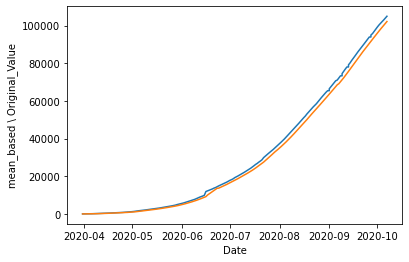

In [7]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-1], dc['original_val'][:len(dc)-1])
ax.set_xlabel("Date")
ax.set_ylabel("mean_based \ Original_Value")
ax.plot(dc['date'][:len(dc)-1], dc['mean_based'][:len(dc)-1])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

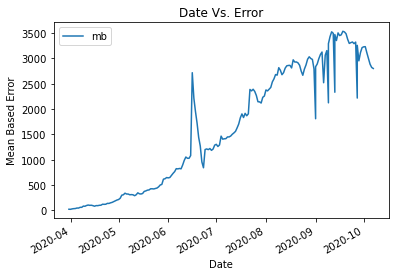

In [8]:
errdf[:len(errdf)-1].plot(x="date",y="mb")
plt.xlabel("Date")
plt.ylabel("Mean Based Error")
plt.title("Date Vs. Error")


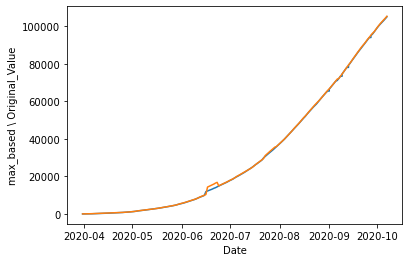

In [9]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-1], dc['original_val'][:len(dc)-1])
ax.set_xlabel("Date")
ax.set_ylabel("max_based \ Original_Value")
ax.plot(dc['date'][:len(dc)-1], dc['max_based'][:len(dc)-1])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

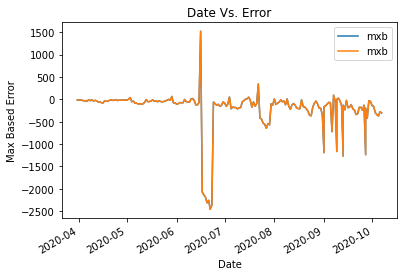

In [10]:
errdf[:len(errdf)-1].plot(x="date",y="mxb")
plt.xlabel("Date")
plt.ylabel("Max Based Error")
plt.title("Date Vs. Error")


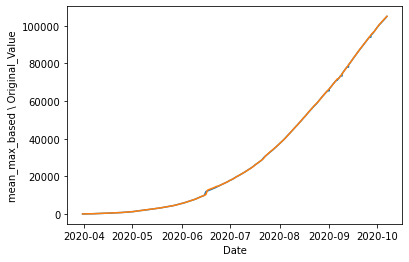

In [11]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-1], dc['original_val'][:len(dc)-1])
ax.set_xlabel("Date")
ax.set_ylabel("mean_max_based \ Original_Value")
ax.plot(dc['date'][:len(dc)-1], dc['mean_max_based'][:len(dc)-1])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

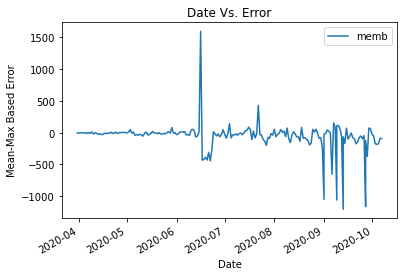

In [12]:
errdf[:len(errdf)-1].plot(x="date",y="memb")
plt.xlabel("Date")
plt.ylabel("Mean-Max Based Error")
plt.title("Date Vs. Error")


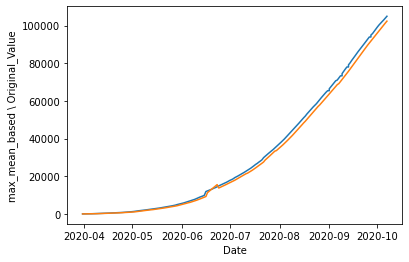

In [13]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-1], dc['original_val'][:len(dc)-1])
ax.set_xlabel("Date")
ax.set_ylabel("max_mean_based \ Original_Value")
ax.plot(dc['date'][:len(dc)-1], dc['max_mean_based'][:len(dc)-1])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

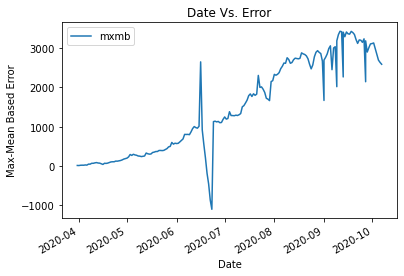

In [14]:
errdf[:len(errdf)-1].plot(x="date",y="mxmb")
plt.xlabel("Date")
plt.ylabel("Max-Mean Based Error")
plt.title("Date Vs. Error")


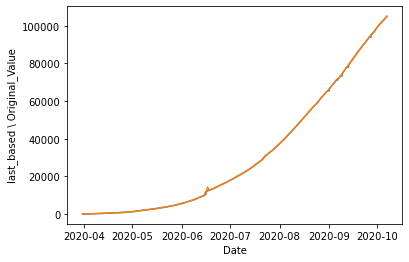

In [15]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-1], dc['original_val'][:len(dc)-1])
ax.set_xlabel("Date")
ax.set_ylabel("last_based \ Original_Value")
ax.plot(dc['date'][:len(dc)-1], dc['last_based'][:len(dc)-1])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

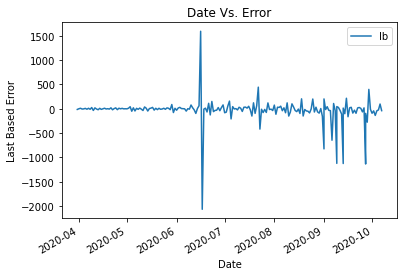

In [16]:
errdf[:len(errdf)-1].plot(x="date",y="lb")
plt.xlabel("Date")
plt.ylabel("Last Based Error")
plt.title("Date Vs. Error")


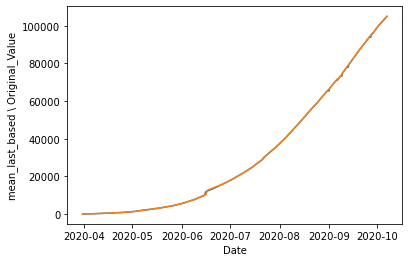

In [17]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-1], dc['original_val'][:len(dc)-1])
ax.set_xlabel("Date")
ax.set_ylabel("mean_last_based \ Original_Value")
ax.plot(dc['date'][:len(dc)-1], dc['mean_last_based'][:len(dc)-1])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

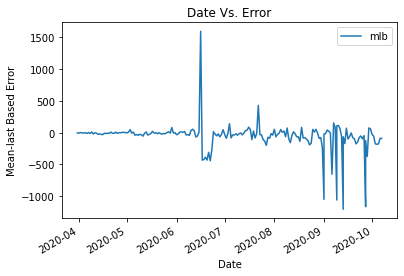

In [18]:
errdf[:len(errdf)-1].plot(x="date",y="mlb")
plt.xlabel("Date")
plt.ylabel("Mean-last Based Error")
plt.title("Date Vs. Error")


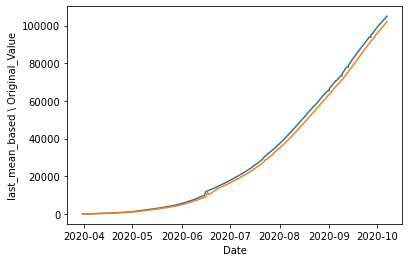

In [19]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-1], dc['original_val'][:len(dc)-1])
ax.set_xlabel("Date")
ax.set_ylabel("last_mean_based \ Original_Value")
ax.plot(dc['date'][:len(dc)-1], dc['last_mean_based'][:len(dc)-1])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

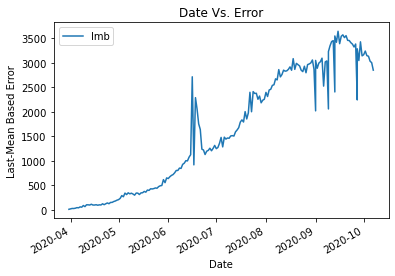

In [20]:
errdf[:len(errdf)-1].plot(x="date",y="lmb")
plt.xlabel("Date")
plt.ylabel("Last-Mean Based Error")
plt.title("Date Vs. Error")


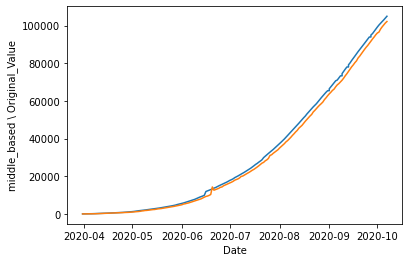

In [21]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-1], dc['original_val'][:len(dc)-1])
ax.set_xlabel("Date")
ax.set_ylabel("middle_based \ Original_Value")
ax.plot(dc['date'][:len(dc)-1], dc['middle_based'][:len(dc)-1])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

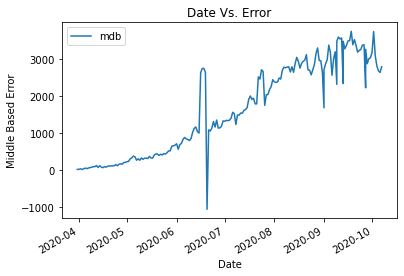

In [22]:
errdf[:len(errdf)-1].plot(x="date",y="mdb")
plt.xlabel("Date")
plt.ylabel("Middle Based Error")
plt.title("Date Vs. Error")


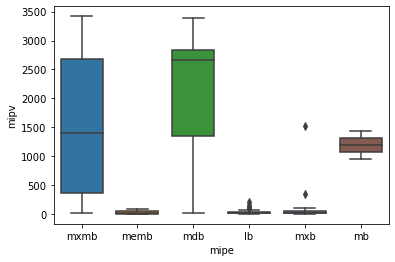

In [23]:
sns.boxplot(x='mipe',y='mipv',data=erdtpv,width=0.75)


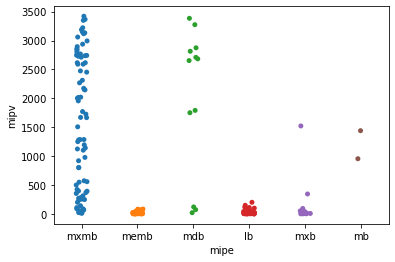

In [24]:
sns.stripplot(x='mipe',y='mipv',data=erdtpv,jitter=True)

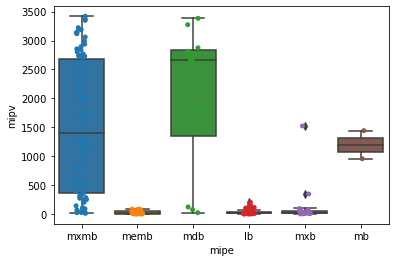

In [25]:
sns.boxplot(x='mipe',y='mipv',data=erdtpv)

sns.stripplot(x='mipe',y='mipv',data=erdtpv,jitter=True)

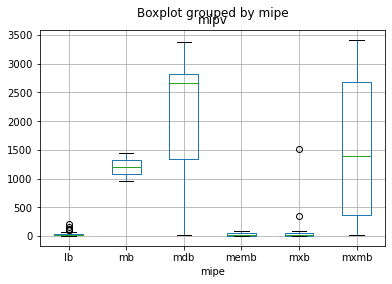

In [26]:
erdtpv.boxplot(by='mipe', column=['mipv'], grid=True)

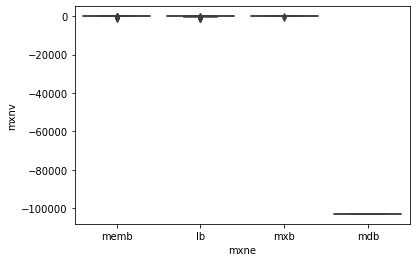

In [27]:
sns.boxplot(x='mxne',y='mxnv',data=erdtnv)

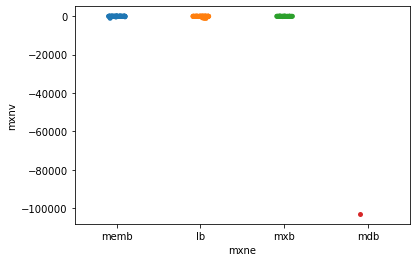

In [28]:
sns.stripplot(x='mxne',y='mxnv',data=erdtnv,jitter=True)

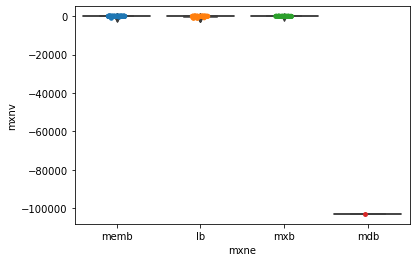

In [29]:
sns.boxplot(x='mxne',y='mxnv',data=erdtnv)
sns.stripplot(x='mxne',y='mxnv',data=erdtnv,jitter=True)

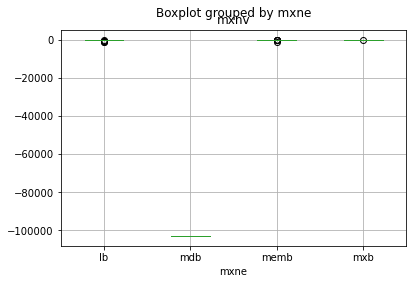

In [30]:
erdtnv.boxplot(by='mxne', column=['mxnv'], grid=True)